# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

Load data

In [2]:
df=pd.read_csv("train555.csv")

In [3]:
df.head(20)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
5,6,0.90,Very Good,G,IF,63.1,58.0,5670,6.18,6.09,3.87
6,7,0.71,Very Good,F,VS1,61.8,60.0,3017,5.66,5.70,3.51
7,8,0.70,Ideal,F,SI1,61.3,57.0,2288,5.72,5.77,3.52
8,9,0.59,Ideal,D,VS1,60.9,56.0,2175,5.39,5.44,3.30
9,10,0.31,Very Good,G,VVS1,59.8,62.0,761,4.35,4.41,2.62


Analyze dataset

In [4]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Summary statistics of a numerical columns
summary_stats = df['price'].describe()
summary_stats

count    43152.000000
mean      3929.491912
std       3985.527795
min        326.000000
25%        947.750000
50%       2401.000000
75%       5312.000000
max      18823.000000
Name: price, dtype: float64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Count the ocurrences of unique values in a categorica 1 column

In [15]:
value_counts=df['cut'].value_counts()
value_counts

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

Bar plot of bar counts

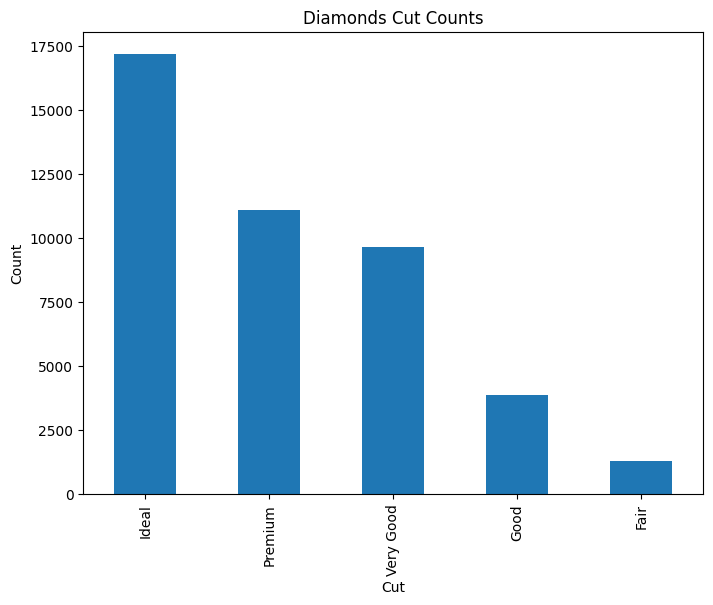

In [19]:
plt.figure(figsize=(8,6))
value_counts.plot(kind='bar')
plt.title('Diamonds Cut Counts')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

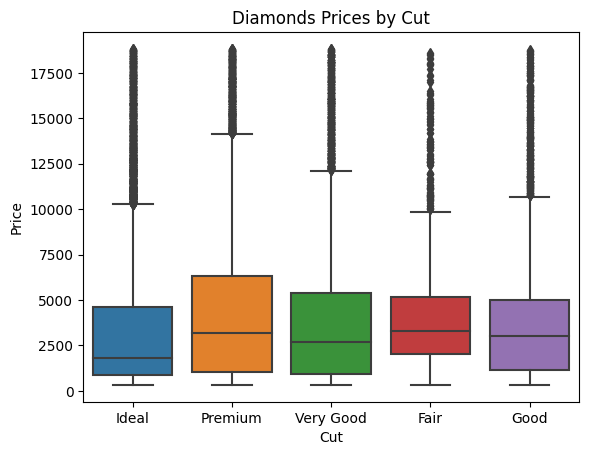

In [23]:
sns.boxplot(x='cut', y='price', data=df)
plt.title('Diamonds Prices by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Carat Vs Price (colored by clarity, sized by depth)')

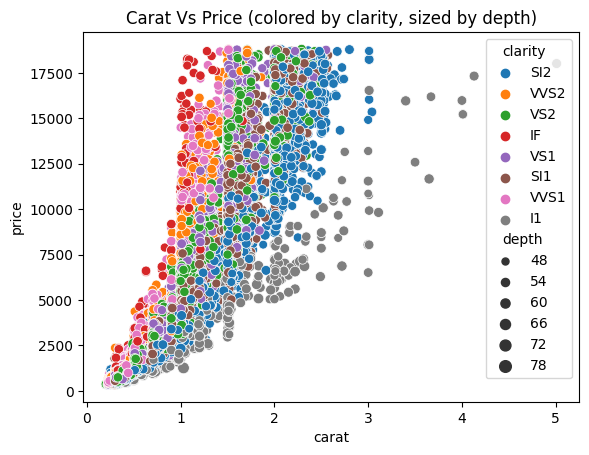

In [25]:
sns.scatterplot(x='carat', y='price', hue='clarity', size='depth', data=df)
plt.title('Carat Vs Price (colored by clarity, sized by depth)')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Data cleaning

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


# Machine Learning

In [29]:
data=pd.get_dummies(df, columns=['cut', 'color', 'clarity'])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.2, random_state=42)

In [32]:
# fit linear regression model
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
# Make predictions on test set
y_pred= model.predict(x_test)

In [34]:
r2 = r2_score(y_test, y_pred)
print("R_squared score:", r2)

R_squared score: 0.9245042078280334


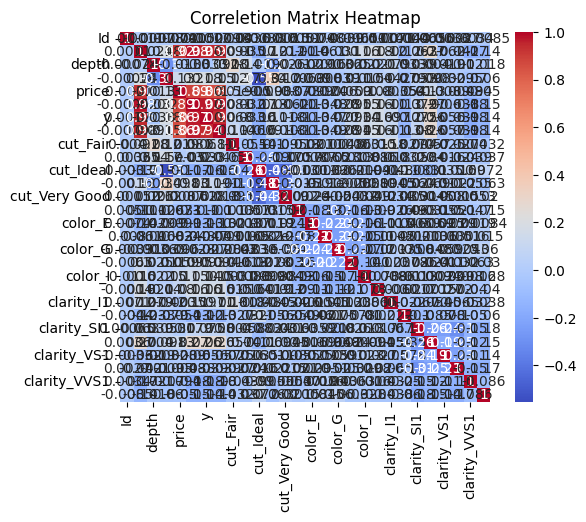

In [45]:
corr_matrix = data.corr()
# create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correletion Matrix Heatmap')
plt.show()

predicted labels

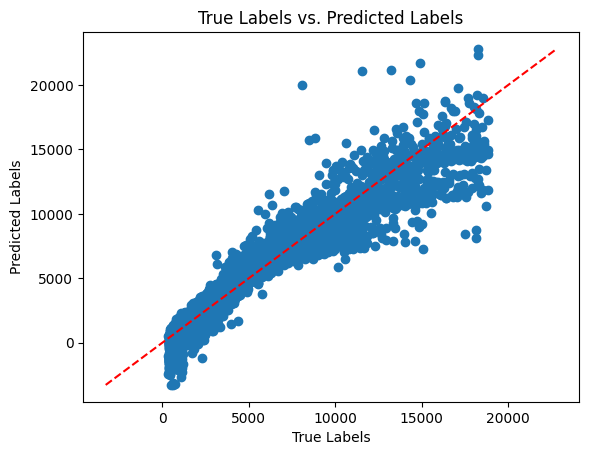

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True Labels vs. Predicted Labels')

# Add a diagonal line for reference
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

# Show the plot
plt.show()

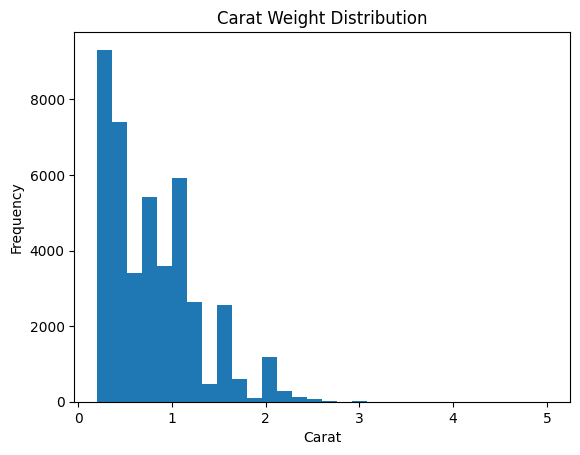

In [51]:
plt.hist(data['carat'], bins=30)
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.title('Carat Weight Distribution')
plt.show()

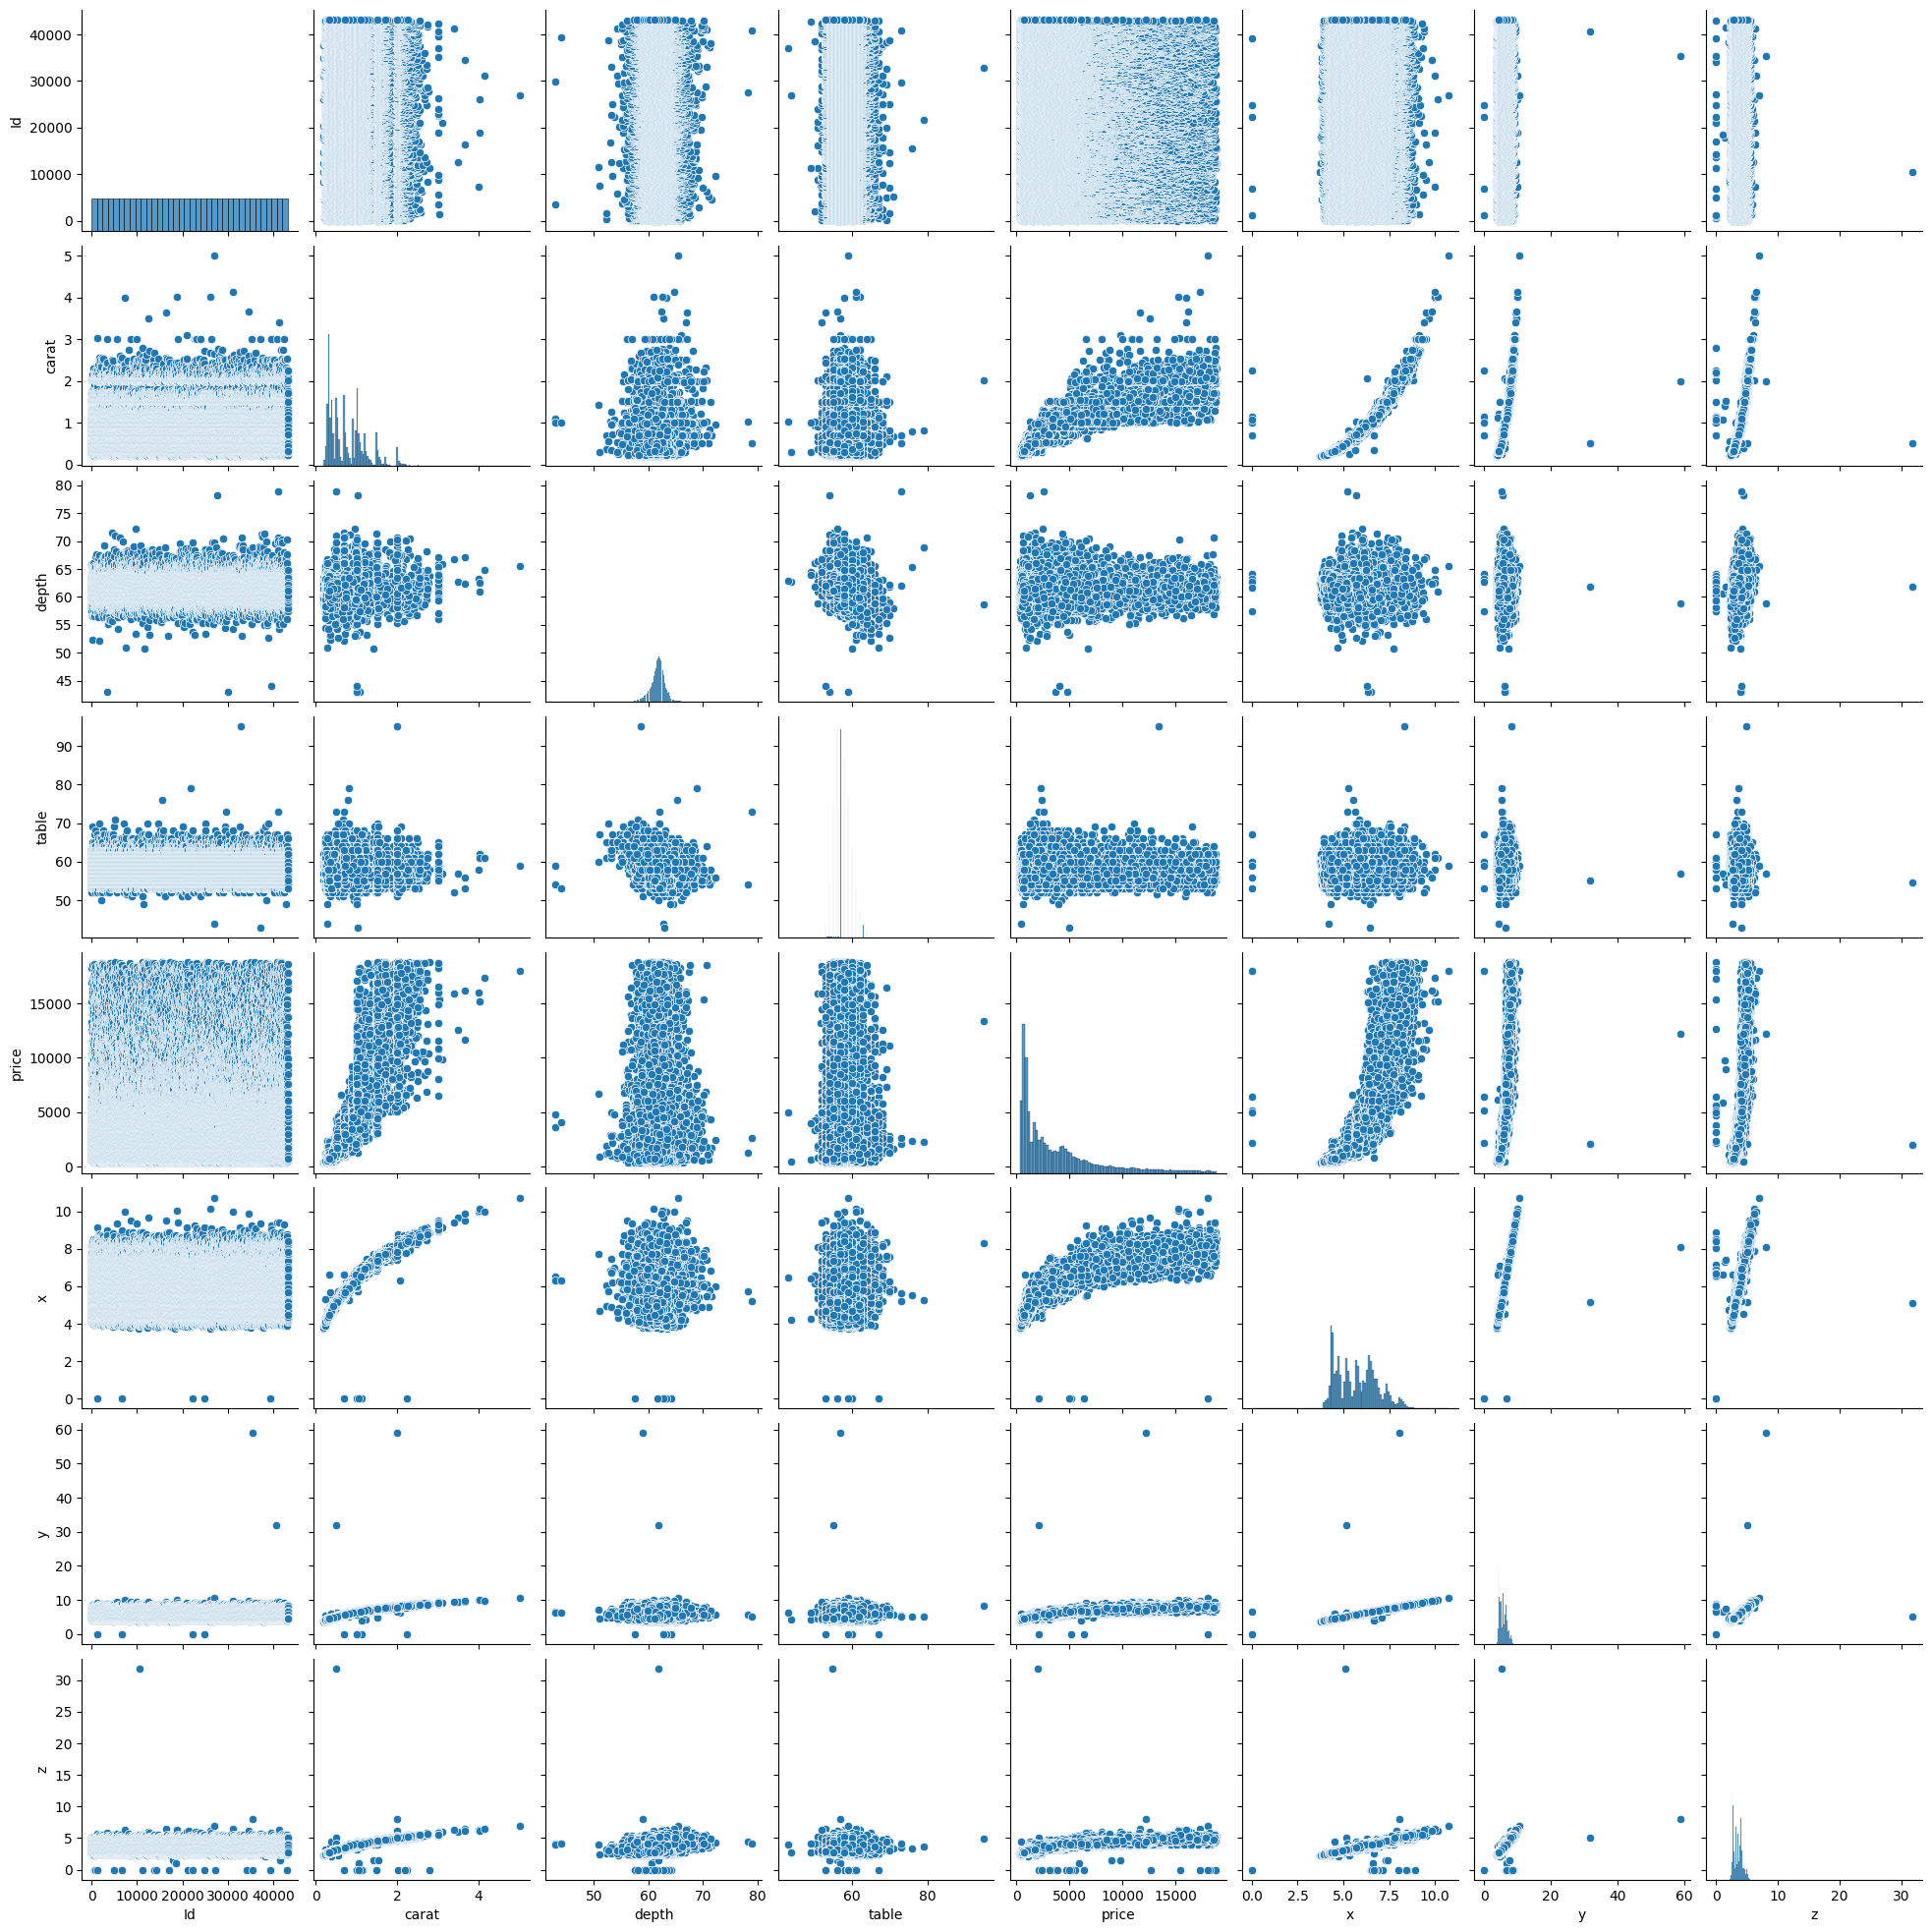

In [52]:
sns.pairplot(df)

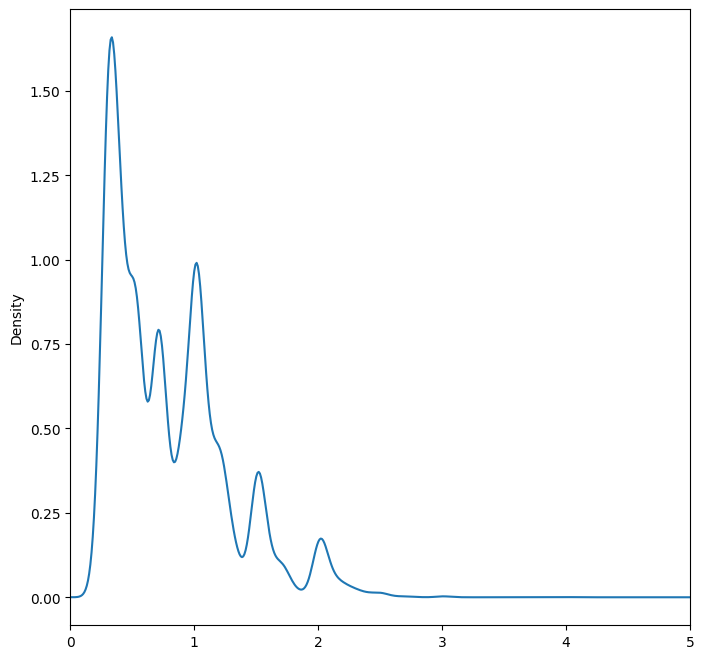

In [53]:
df["carat"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,5));     # Limit x axis values

In [54]:
carat_table = pd.crosstab(index=df["clarity"], columns="count")
carat_table

col_0,count
clarity,
I1,606
IF,1442
SI1,10428
SI2,7432
VS1,6475
VS2,9824
VVS1,2904
VVS2,4041


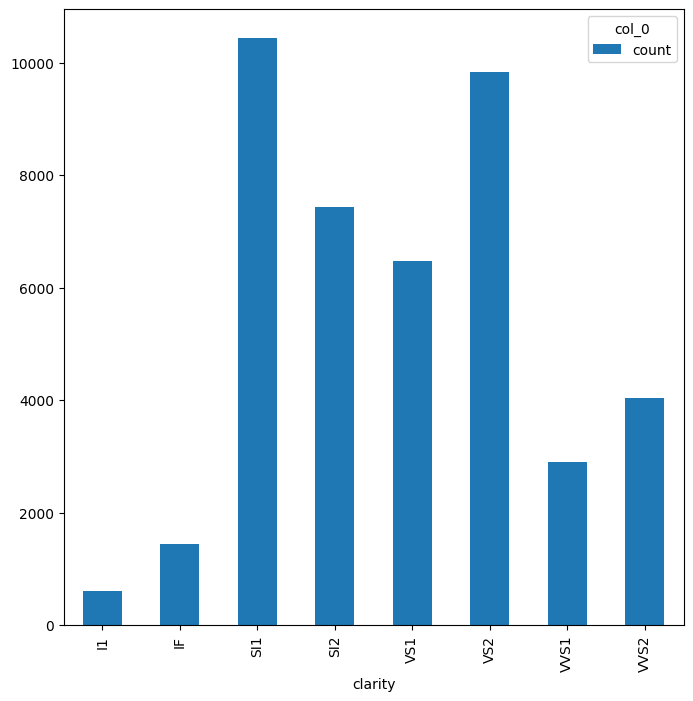

In [55]:
carat_table.plot(kind="bar",
                 figsize=(8,8));

In [59]:
carat_table=pd.crosstab(index=df['clarity'], columns=df["color"])
carat_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,32,80,116,130,136,73,39
IF,56,124,318,539,244,119,42
SI1,1697,1935,1700,1584,1784,1105,623
SI2,1099,1392,1292,1243,1287,730,389
VS1,535,1024,1069,1728,937,744,438
VS2,1362,1984,1773,1881,1305,918,601
VVS1,195,519,580,800,472,282,56
VVS2,445,774,785,1155,486,294,102


<Axes: xlabel='clarity'>

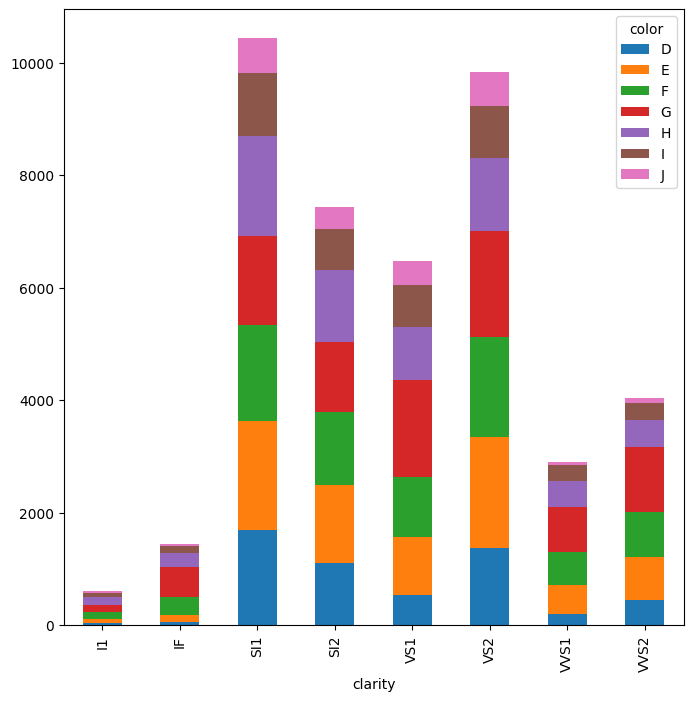

In [62]:
carat_table.plot(kind="bar", figsize=(8,8), stacked=True)

<Axes: xlabel='clarity'>

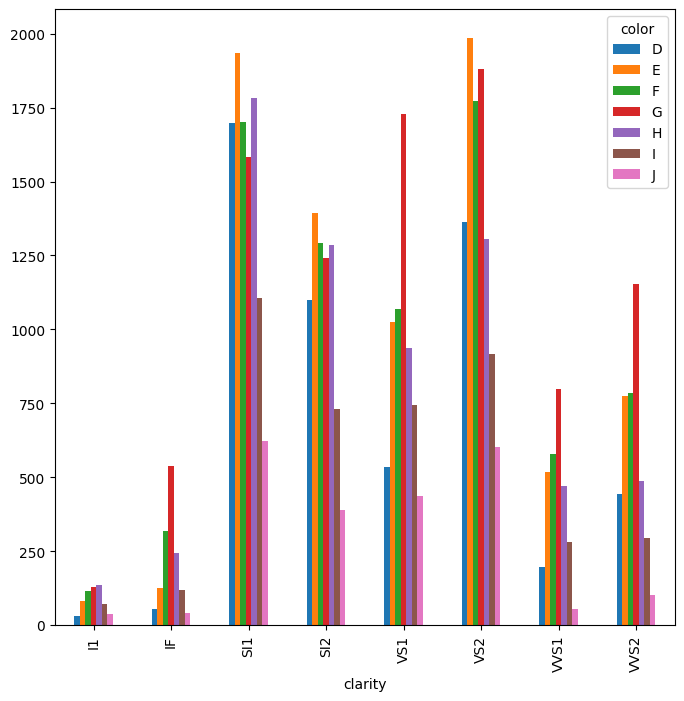

In [64]:
carat_table.plot(kind="bar", figsize=(8,8), stacked=False)

# Subplots

In [65]:
carat_table

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,32,80,116,130,136,73,39
IF,56,124,318,539,244,119,42
SI1,1697,1935,1700,1584,1784,1105,623
SI2,1099,1392,1292,1243,1287,730,389
VS1,535,1024,1069,1728,937,744,438
VS2,1362,1984,1773,1881,1305,918,601
VVS1,195,519,580,800,472,282,56
VVS2,445,774,785,1155,486,294,102


array([<Axes: xlabel='clarity'>, <Axes: xlabel='clarity'>,
       <Axes: xlabel='clarity'>, <Axes: xlabel='clarity'>,
       <Axes: xlabel='clarity'>, <Axes: xlabel='clarity'>,
       <Axes: xlabel='clarity'>], dtype=object)

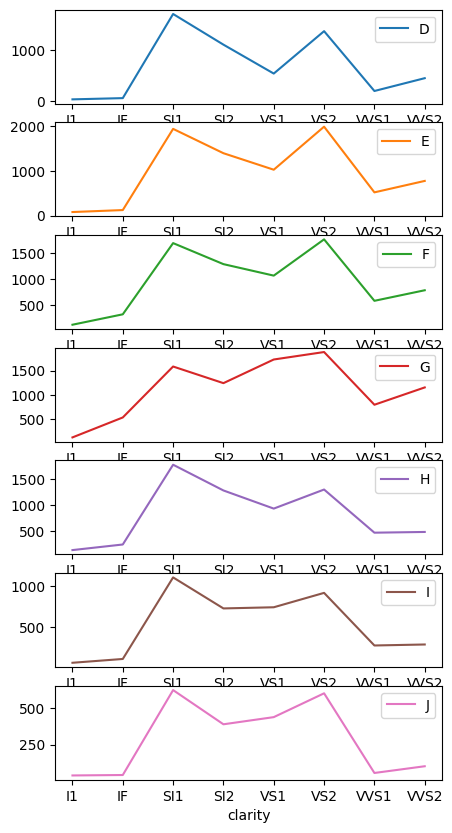

In [67]:
carat_table.plot(subplots=True, sharex =False, figsize=(5,10))
# plt.tight_layout()

array([[<Axes: xlabel='clarity'>, <Axes: xlabel='clarity'>,
        <Axes: xlabel='clarity'>],
       [<Axes: xlabel='clarity'>, <Axes: xlabel='clarity'>,
        <Axes: xlabel='clarity'>],
       [<Axes: xlabel='clarity'>, <Axes: xlabel='clarity'>,
        <Axes: xlabel='clarity'>]], dtype=object)

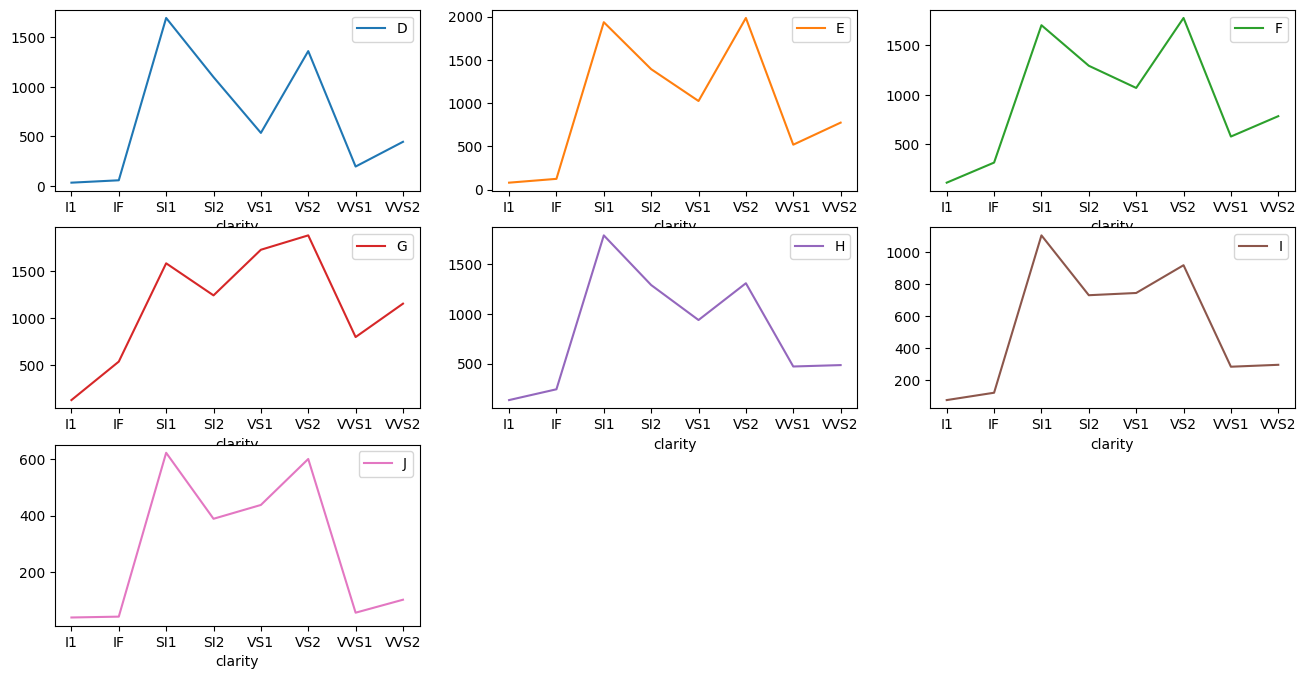

In [68]:
carat_table.plot(subplots= True, sharex=False, layout=(3,3), figsize=(16,8))
#plt.tight_layout

# Scatterplots

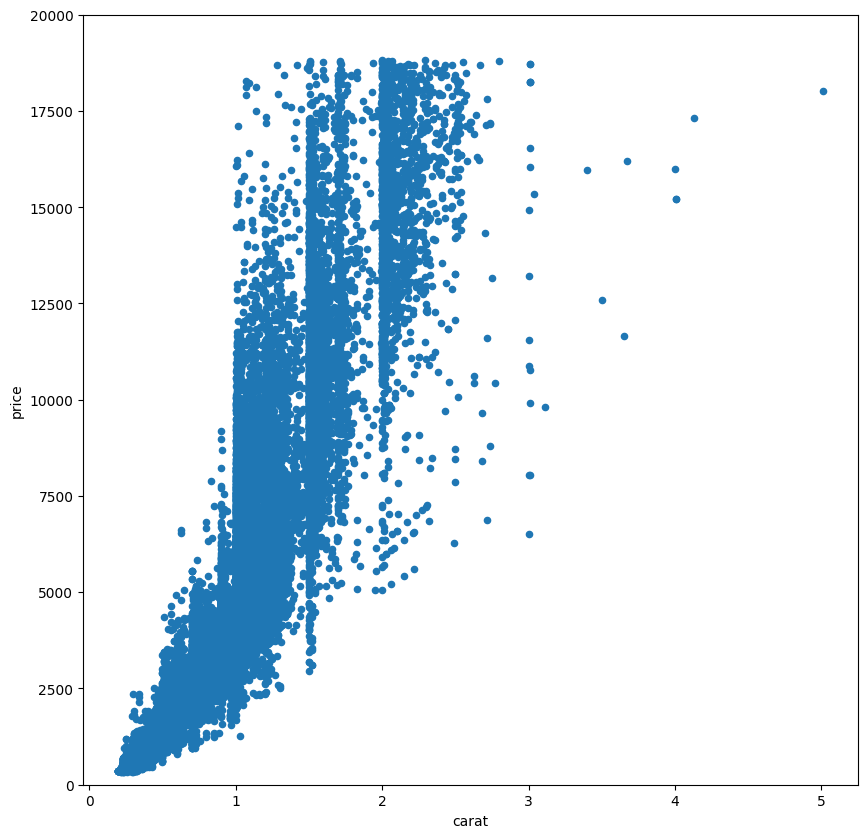

In [70]:
df.plot(kind="scatter",     # Create a scatterplot
              x="carat",          # Put carat on the x axis
              y="price",          # Put price on the y axis
              figsize=(10,10), ylim=(0,20000));

# Line Plots

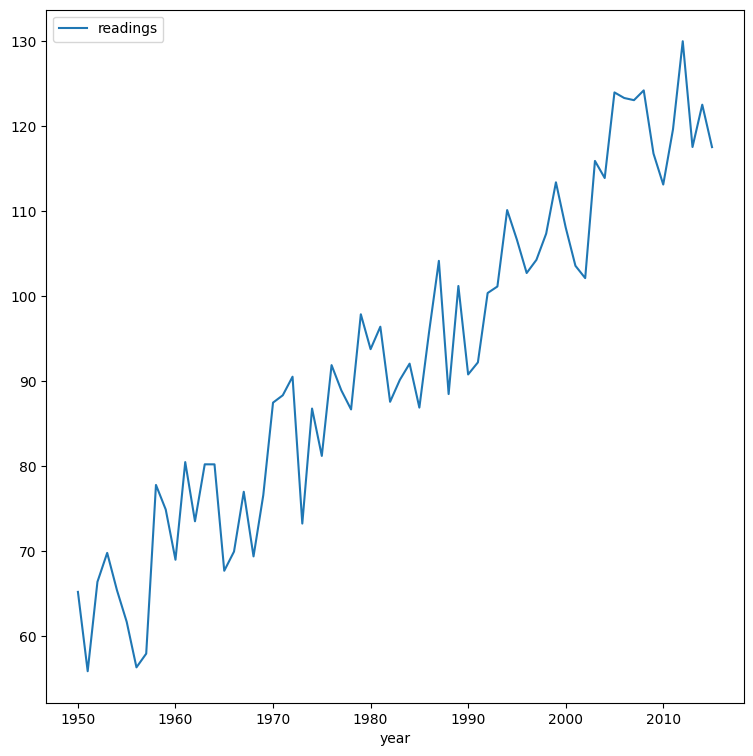

In [71]:
#time_df
# Generate some data
years = [y for y in range(1950,2016)]
readings = [(y+np.random.uniform(0,20)-1900) for y in years]
time_df = pd.DataFrame({"year":years, "readings":readings})
# Plot the data
time_df.plot(x="year", y="readings", figsize=(9,9));

Saving Plots

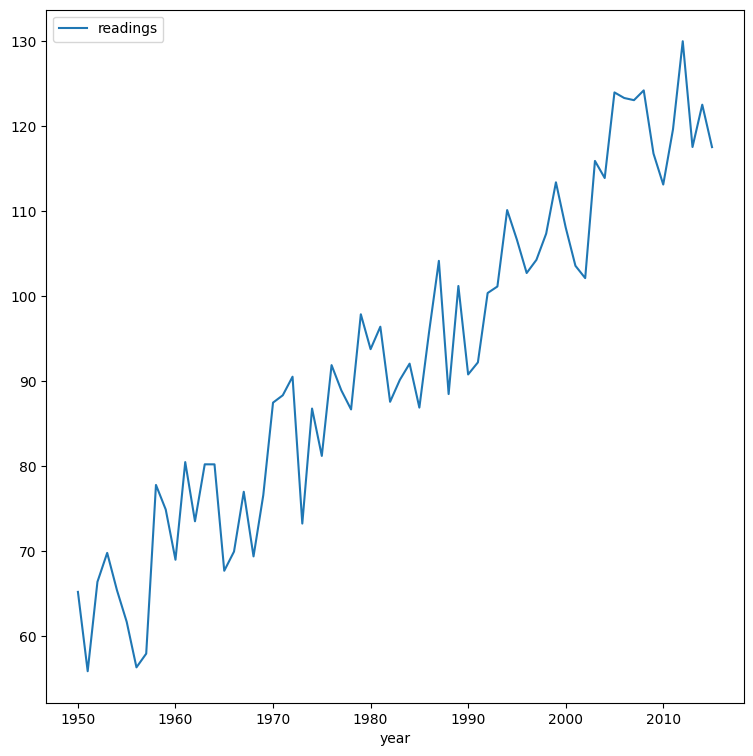

In [72]:
my_plot = time_df.plot(x="year",     # Create the plot and save to a variable
             y="readings",
             figsize=(9,9))

my_fig = my_plot.get_figure()            # Get the figure

my_fig.savefig("line_plot_example.png")  # Save to file

# Matplotlib

In [73]:
from numpy.random import randint

In [74]:
# You can get a list of all the functions which can be used on plt by running the command dir(plt).
#dir(plt)
# Generate some data
years = [y for y in range(1950,2016)]

readings = [(y+np.random.uniform(0,20)-1900) for y in years]

time_df = pd.DataFrame({"year":years,
                        "readings":readings})

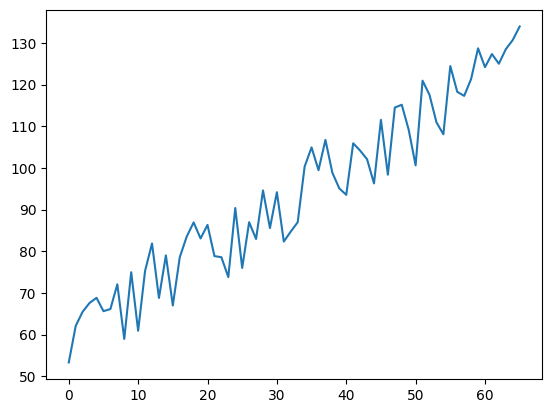

In [75]:
plt.plot(time_df.readings)

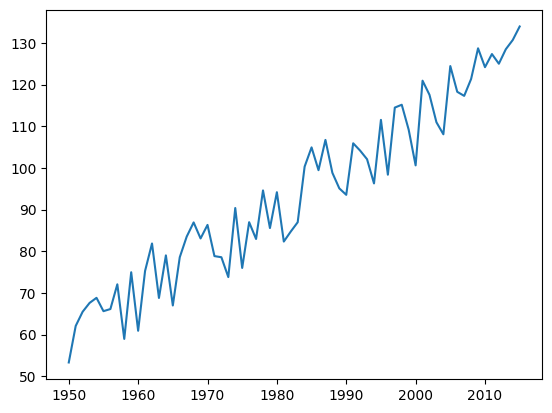

In [76]:
plt.plot(time_df.year,time_df.readings)

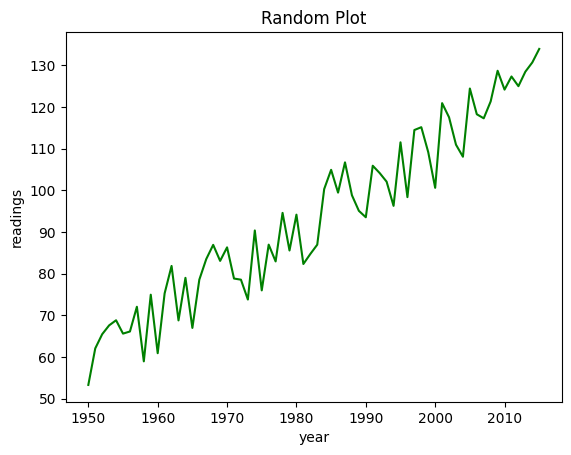

In [77]:
x = time_df.year
y = time_df.readings
plt.plot(x, y, color = 'g')
plt.xlabel('year')
plt.ylabel('readings')
plt.title('Random Plot')
plt.show()

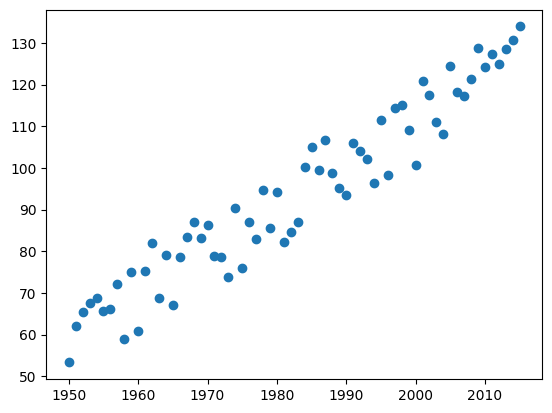

In [78]:
plt.scatter(x, y)

In [79]:
carat_table = pd.crosstab(index=df["clarity"], columns="count")
carat_table

col_0,count
clarity,
I1,606
IF,1442
SI1,10428
SI2,7432
VS1,6475
VS2,9824
VVS1,2904
VVS2,4041


<BarContainer object of 8 artists>

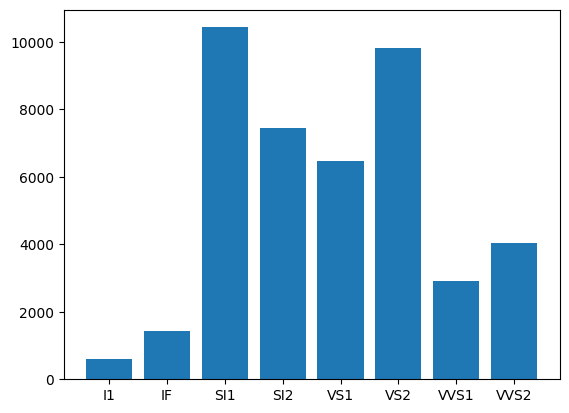

In [80]:
x = carat_table.index.tolist()
y = carat_table["count"]
plt.bar(x,y)

In [81]:
type(carat_table.count)

method

(array([0.000e+00, 0.000e+00, 1.800e+01, 9.920e+02, 7.837e+03, 4.355e+03,
        9.550e+02, 4.012e+03, 1.739e+03, 1.822e+03, 2.712e+03, 1.086e+03,
        1.768e+03, 5.560e+02, 4.597e+03, 1.770e+03, 1.102e+03, 1.822e+03,
        5.370e+02, 3.450e+02, 1.270e+02, 1.773e+03, 6.310e+02, 2.610e+02,
        4.380e+02, 9.400e+01, 4.000e+01, 2.900e+01, 8.300e+02, 2.640e+02,
        2.000e+02, 1.230e+02, 9.400e+01, 6.000e+01, 3.600e+01, 5.700e+01,
        2.000e+01, 8.000e+00, 9.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        1.600e+01, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.  , 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49, 0.56, 0.63, 0.7 ,
        0.77, 0.84, 0.91, 0.98, 1.05, 1.12, 1.19, 1.26, 1.33, 1.4 , 1.47,
        1.54, 1.61, 1.68, 1.75, 1.82, 1.89, 1.96, 2.03, 2.1 , 2.17, 2.24,
        2.31, 2.38, 2.45, 2.52, 2.59, 2.66, 2.73, 2.8 , 2.87, 2.94, 3.01,
        3.08, 3.15, 3.22, 3.29, 3.36, 3.43, 3.5 ]),
 <BarContainer object of 50 

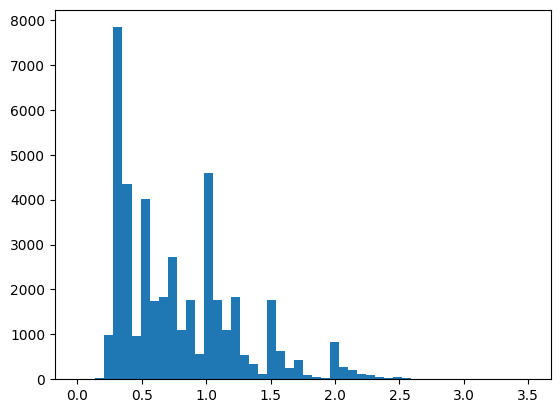

In [82]:
plt.hist(df["carat"], bins=50, range= (0,3.5))

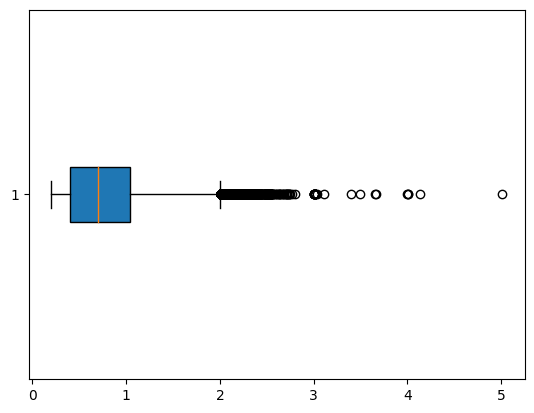

In [83]:
plt.boxplot(df["carat"], vert = False, patch_artist= True)
plt.show()

# Subploting

In [84]:
x = randint(1, 10, 20).round(1)
x = np.sort(x)
x

array([1, 1, 2, 2, 2, 3, 4, 4, 5, 5, 5, 5, 5, 5, 6, 7, 7, 7, 8, 9])

In [85]:
y = randint(1, 50, 20)
y = np.sort(y)
y

array([ 8,  8, 13, 14, 15, 20, 20, 24, 24, 26, 30, 30, 35, 39, 40, 43, 45,
       45, 47, 48])

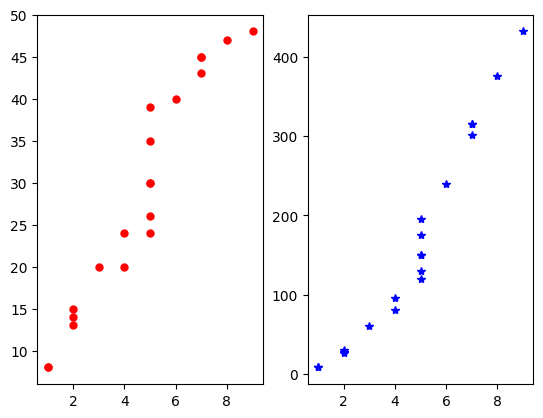

In [86]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'ro', markersize = 5)

plt.subplot(1, 2, 2)
y2 = y*x
plt.plot(x, y2, 'b*')

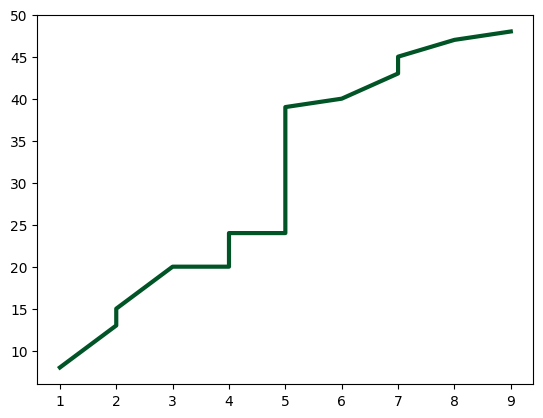

In [87]:
fig, ax = plt.subplots()
ax.plot(x, y, markersize = 12, linewidth = 3, color = '#005425')

Text(0.5, 1.0, 'Y2 Plot')

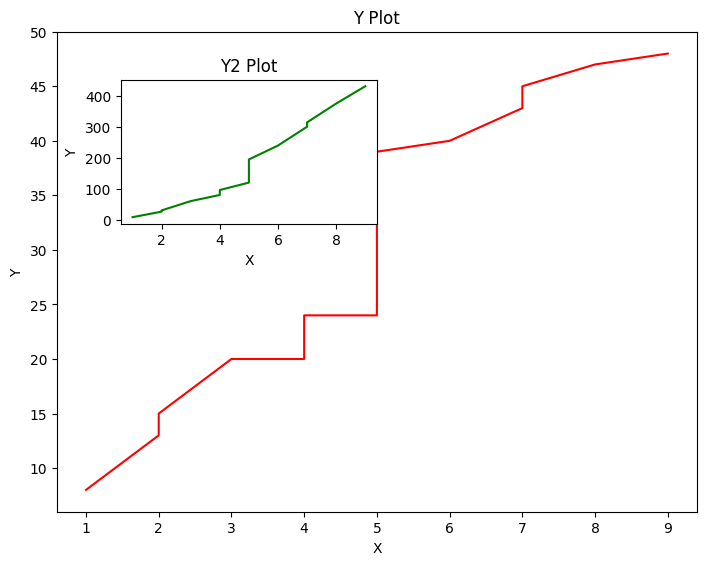

In [89]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.1, 0.6, 0.4, 0.3])

ax1.plot(x, y, 'r')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Y Plot')

ax2.plot(x, y2, 'g')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Y2 Plot')

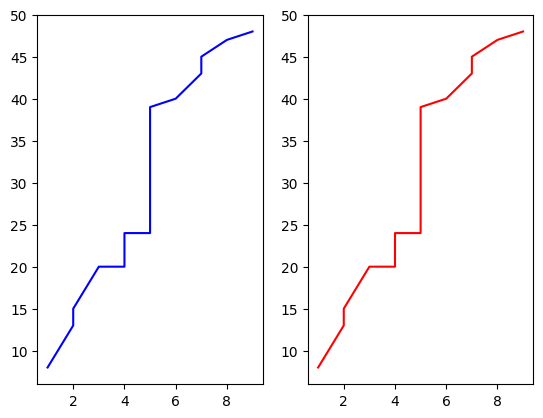

In [90]:
fig, ax = plt.subplots(1,2)

ax[0].plot(x, y, 'b')

ax[1].plot(x, y, 'r')

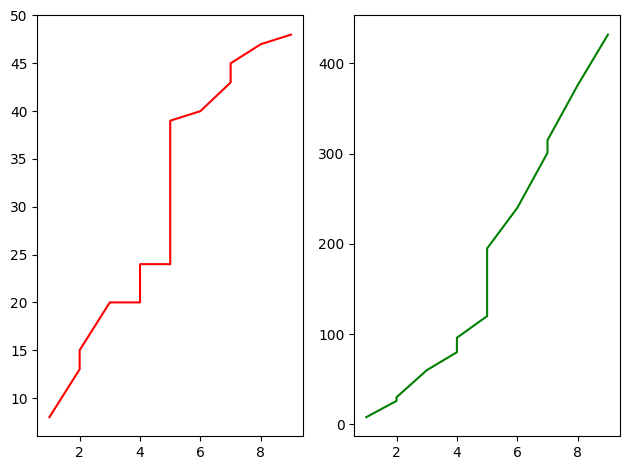

In [91]:
fig, ax = plt.subplots(1, 2)
col = ['r', 'g']
data = [y, y2]

for i, axes in enumerate(ax):
    axes.plot(x, data[i], col[i])

fig.tight_layout()

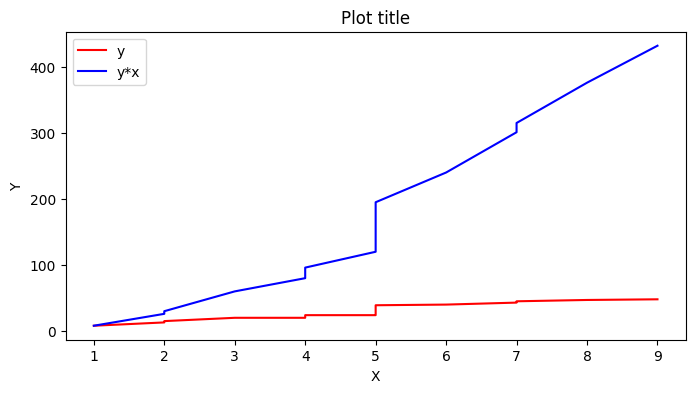

In [92]:
fig, ax = plt.subplots(figsize = (8,4), dpi = 100)
ax.plot(x, y, 'r', label = 'y')
ax.plot(x, y2, 'b', label = 'y*x')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Plot title')
ax.legend(loc = 0)
fig.savefig('my_plot.png', dpi = 100)

(1.0, 4.0)

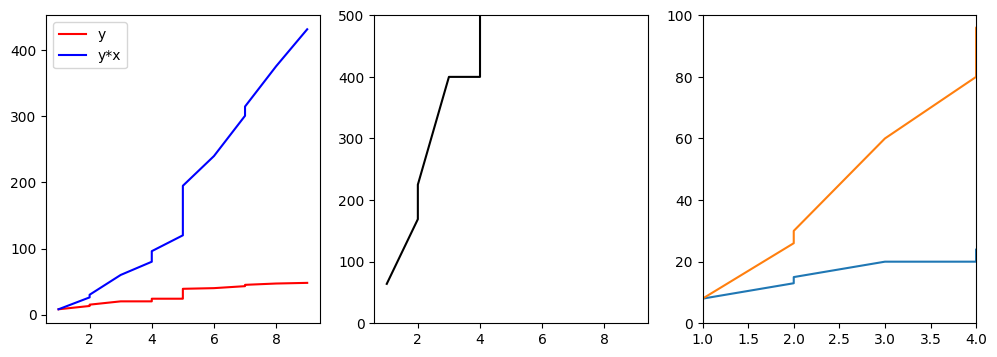

In [93]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

ax[0].plot(x, y, 'r', label = 'y')
ax[0].plot(x, y2, 'b', label = 'y*x')
ax[0].legend(loc = "upper left") # if labels are defined

ax[1].plot(x, y**2, 'k')
ax[1].set_ylim([0, 500])

ax[2].plot(x, y, x, y2)
ax[2].set_ylim([0, 100])
ax[2].set_xlim([1 ,4])

In [94]:
import matplotlib.pylab as pylab
from scipy import stats
from scipy.stats import norm, skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [96]:
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [98]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]
df.describe()

,Id,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,21577.642796,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,12456.553482,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,10789.500000,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,21578.000000,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,32364.500000,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Show Categorical data and categorical inside it

In [99]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns

['cut', 'color', 'clarity']

In [100]:
# Getting the categories of each categorical column
for col in categorical_columns:
    print(col, df[col].unique())

cut ['Ideal' 'Premium' 'Very Good' 'Fair' 'Good']
color ['I' 'G' 'F' 'H' 'D' 'E' 'J']
clarity ['SI2' 'VVS2' 'VS2' 'IF' 'VS1' 'SI1' 'VVS1' 'I1']


Visualize the categorical data

In [101]:
# Checking the corr with price and other attributes
categorical_data = df.select_dtypes(exclude=[np.number]).columns

In [102]:
def pie(column):
    labels=df[column].unique()
    size=[]
    for i in labels:
        value=df[column].value_counts()[[i]]
        size.append(int(value.values))
    return labels,size

In [103]:
labels,sizes=pie('cut')
labels2,sizes2=pie('color')
labels3,sizes3=pie('clarity')

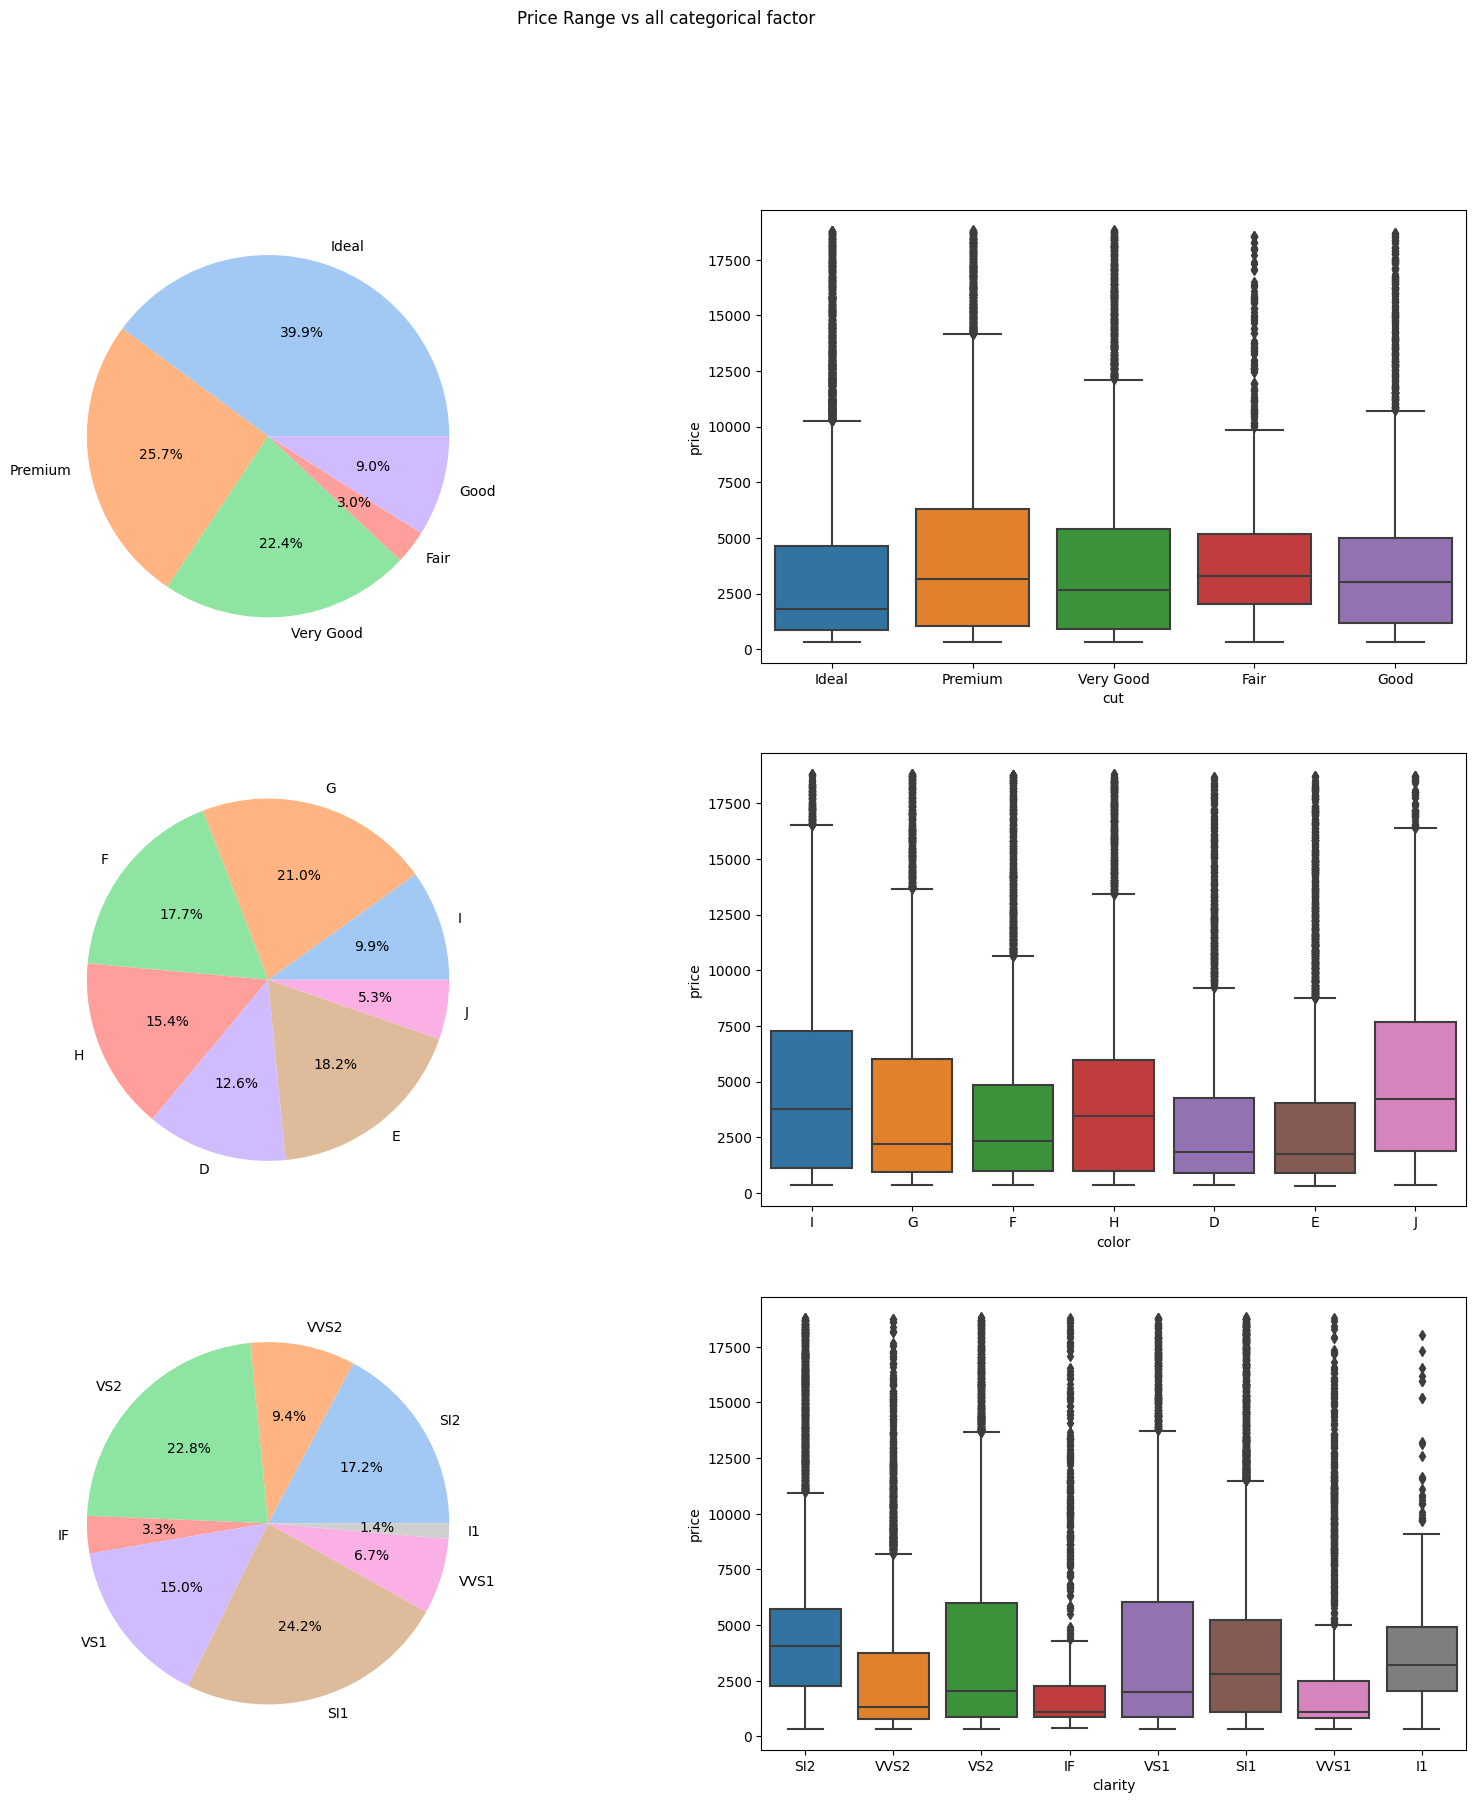

In [105]:
# visualstion for categorical 
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
colors = sns.color_palette('pastel')[0:8]
fig.suptitle('Price Range vs all categorical factor')
axes[0,0].pie(x=sizes, labels=labels,colors = colors,autopct='%1.1f%%')
sns.boxplot(ax=axes[0, 1], data=df, x='cut', y='price')
axes[1,0].pie(x=sizes2, labels=labels2,colors = colors,autopct='%1.1f%%')
sns.boxplot(ax=axes[1, 1], data=df, x='color', y='price')
axes[2,0].pie(x=sizes3, labels=labels3,colors = colors,autopct='%1.1f%%')
sns.boxplot(ax=axes[2, 1], data=df, x='clarity', y='price')
plt.show()

In [106]:
# Extracting the correlation between price and the other columns
corr = df.corr()['price'].sort_values(ascending=False)
corr

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19876\2288634969.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['price'].sort_values(ascending=False)


price    1.000000
carat    0.921872
x        0.887172
z        0.864861
y        0.862936
table    0.128571
Id      -0.001075
depth   -0.013225
Name: price, dtype: float64

In [107]:
corr_feats = corr.index[1:5]
corr_feats

Index(['carat', 'x', 'z', 'y'], dtype='object')

<Figure size 500x500 with 0 Axes>

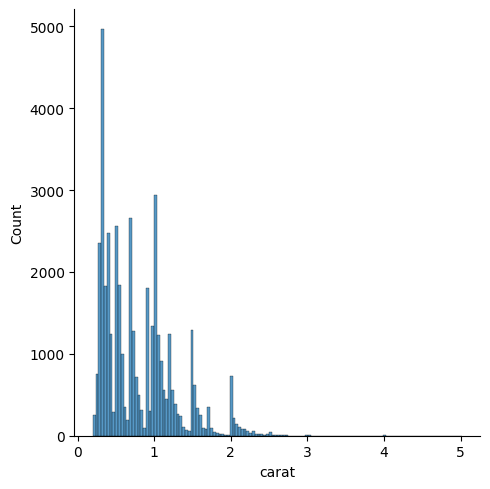

<Figure size 500x500 with 0 Axes>

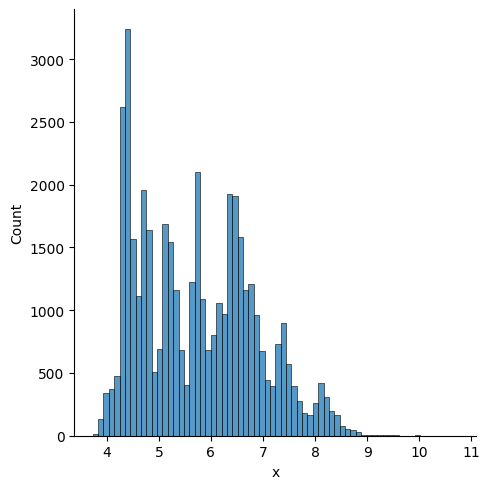

<Figure size 500x500 with 0 Axes>

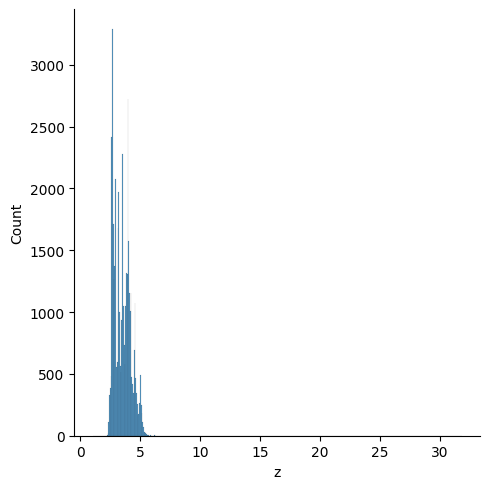

<Figure size 500x500 with 0 Axes>

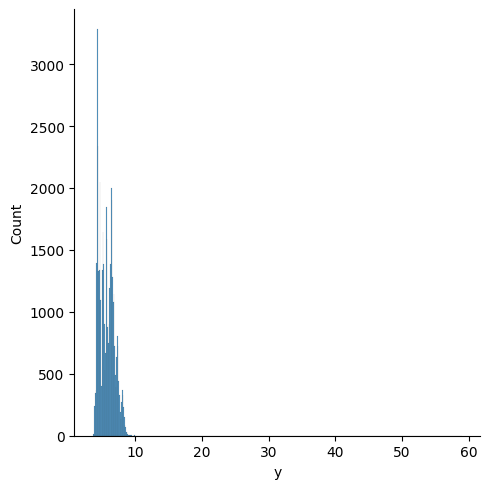

In [108]:
for feat in corr_feats:
    plt.figure(figsize=(5, 5))
    sns.displot(x=feat, data=df)
    plt.xlabel(feat)

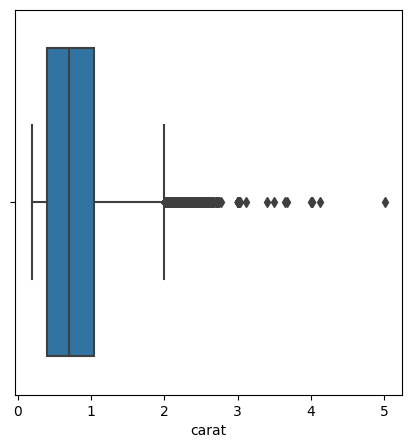

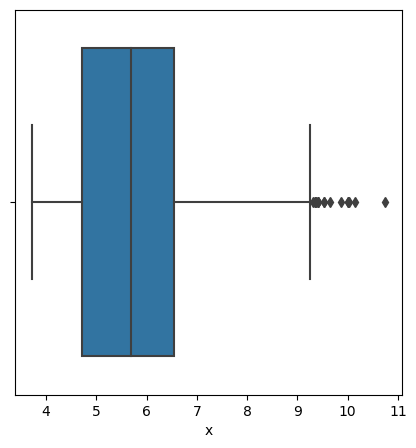

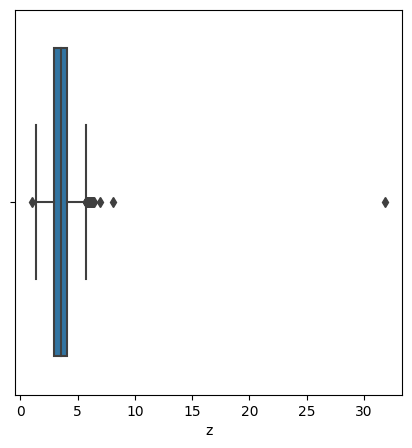

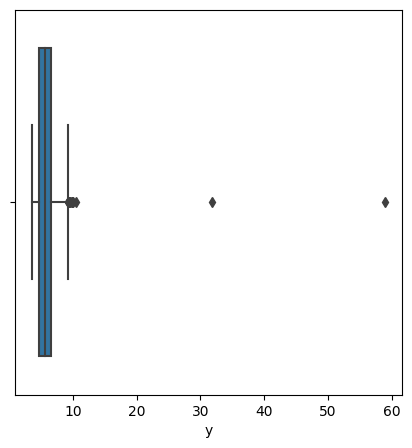

In [109]:
for feat in corr_feats:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=feat, data=df)
    plt.xlabel(feat)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19876\3037932146.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

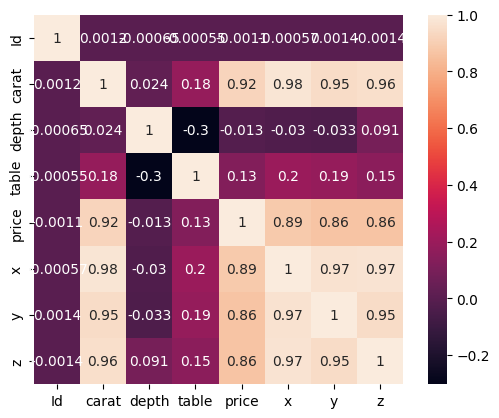

In [110]:
corr = df.corr()

sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [113]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [117]:
from sklearn import preprocessing
#preprocessing :

In [120]:
#convert categorical value

label_cut = preprocessing.LabelEncoder()
label_color = preprocessing.LabelEncoder()
label_clarity = preprocessing.LabelEncoder()

df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19876\2092370632.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'] = label_cut.fit_transform(df['cut'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19876\2092370632.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = label_color.fit_transform(df['color'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19876\2092370632.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [127]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_vali, y_train, y_vali = train_test_split(X,y,test_size=0.2, random_state=42)

In [128]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = lr.predict(X_vali)

# Compute MEA
mse = mean_squared_error(y_vali, y_pred)
print('Mean squared error: {:.2f}'.format(mse))

Mean squared error: 1809373.82


In [140]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [141]:
#Dropping the outliers. 
train_set = train_set[(train_set["depth"]<75)&(train_set["depth"]>45)]
train_set = train_set[(train_set["table"]<80)&(train_set["table"]>40)]
train_set = train_set[(train_set['x']>0)&(train_set["x"]<30)]
train_set = train_set[(train_set['y']>0)&(train_set["y"]<30)]
train_set = train_set[(train_set["z"]<30)&(train_set["z"]>2)]

In [142]:
X_train= train_set.drop(["price"],axis =1)
y_train= train_set["price"]

X_test= test_set.drop(["price"],axis =1)
y_test= test_set["price"]

In [148]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [149]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [155]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1335.668924 
DecisionTree: -792.348114 
RandomForest: -567.833877 
KNeighbors: -944.172656 
XGBRegressor: -554.266947 


In [161]:
pred = pipeline_xgb.predict(X_test)
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9820649748150151
Adjusted R^2: 0.982044158861922
MAE: 281.667105583986
MSE: 289424.63800666947
RMSE: 537.982005281468


In [162]:
test=pd.read_csv('test555.csv')

In [163]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [164]:
# Define the order of the categories
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_order = ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']

# Map the ordered categories to numerical values
test['color'] = test['color'].map({k: i for i, k in enumerate(color_order)})
test['cut'] = test['cut'].map({k: i for i, k in enumerate(cut_order)})
test['clarity'] = test['clarity'].map({k: i for i, k in enumerate(clarity_order)})

In [165]:
Id=test['Id']

In [168]:
test.head(25)

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,4,3,6,61.1,57.0,4.52,4.48,2.75
1,2,0.71,3,1,4,62.7,58.0,5.74,5.68,3.58
2,3,0.44,2,5,3,62.8,56.0,4.83,4.88,3.05
3,4,0.81,3,1,2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,4,3,5,61.2,56.0,4.74,4.80,2.92
5,6,1.27,4,2,3,61.6,55.0,6.97,7.03,4.31
6,7,1.01,2,3,4,61.5,56.0,6.41,6.47,3.96
7,8,1.24,0,2,2,64.9,60.0,6.70,6.63,4.32
8,9,0.71,0,5,4,61.6,67.0,5.76,5.61,3.50
9,10,0.37,2,3,3,61.5,58.0,4.57,4.60,2.82


In [171]:
pred =pipeline_xgb.predict(test.drop('Id',axis=1))
data={'Id': Id, 'price':pred }
sub2= pd.DataFrame(data=data)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Id


In [ ]:
sub2

NameError: name 'sub2' is not defined

In [ ]:
sub2.to_csv('subCODE1.csv',index=False)